# Titanic - A Data Analysis & Visualisation Project


### We begin our analysis by first asking some basic questions like - 


1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

2.) What was the average fare of the Titanic? Who paid the most? Who paid the least

3.) What deck were the passengers on and how does that relate to their class?


4.) Where did the passengers come from?

5.) Who was alone and who was with family?


### And then delve into a deeper question -

6.) How many people survived? What factors helped someone survive the sinking?

### Extra questions we asked -

7.) Who was the oldest person on titanic?

8.) Who was with most family?

## Let's Begin!

In [1]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

titanic_df = pd.read_csv('train.csv')

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


__1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)__

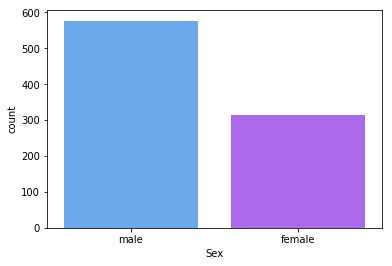

In [6]:
sns.countplot("Sex", data=titanic_df, palette = 'cool')

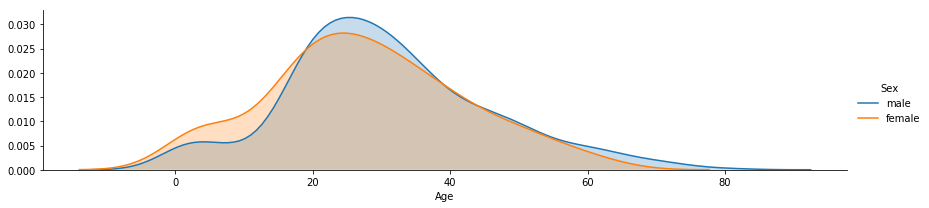

In [7]:
fig = sns.FacetGrid(titanic_df, hue = 'Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade = True)
fig.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 64., 115., 230., 155.,  86.,  42.,  17.,   5.]),
 array([ 0.42  , 10.3675, 20.315 , 30.2625, 40.21  , 50.1575, 60.105 ,
        70.0525, 80.    ]),
 <a list of 8 Patch objects>)

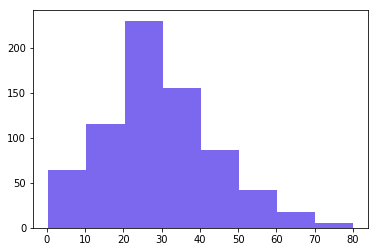

In [8]:
plt.hist("Age", data = titanic_df,  bins = 8, color = 'mediumslateblue')

In [9]:
titanic_df['Age'].mean()

29.69911764705882

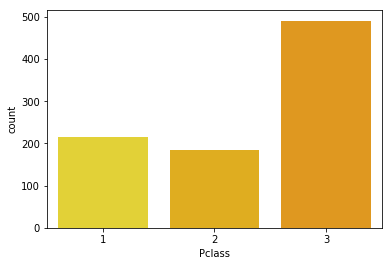

In [10]:
sns.countplot("Pclass", data=titanic_df, palette = 'Wistia')

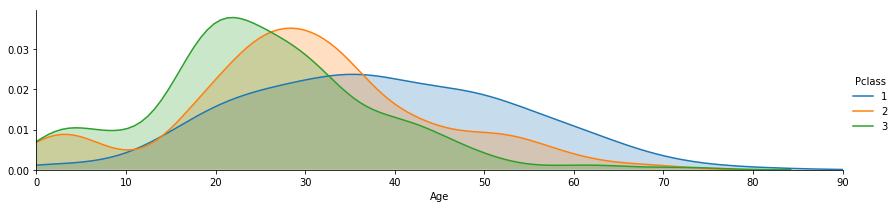

In [11]:
fig = sns.FacetGrid(titanic_df, hue = 'Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade = True)
fig.add_legend()
fig.set(xlim = (0,90))

In [12]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [13]:
titanic_df['Passenger'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis = 1)

In [14]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


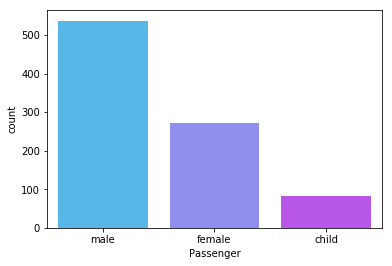

In [15]:
sns.countplot("Passenger", data = titanic_df, palette = 'cool')

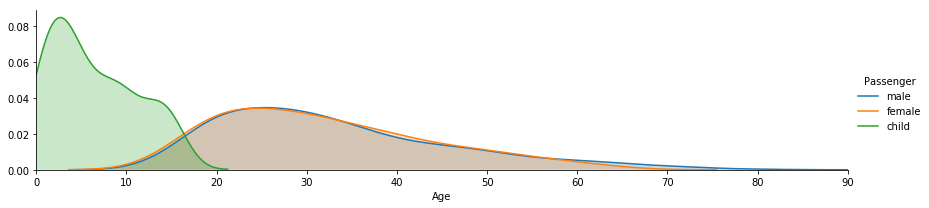

In [16]:
fig = sns.FacetGrid(titanic_df, hue = 'Passenger', aspect=4)
fig.map(sns.kdeplot, 'Age', shade = True)
fig.add_legend()
fig.set(xlim = (0,90))

In [17]:
titanic_df['Passenger'].value_counts()

male      537
female    271
child      83
Name: Passenger, dtype: int64

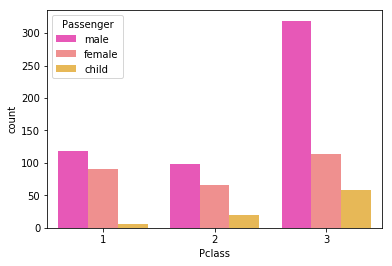

In [18]:
sns.countplot('Pclass', data = titanic_df, hue = 'Passenger', palette = 'spring')

__2.) What was the average fare of the Titanic? Who paid the most? Who paid the least?__

(array([762.,  87.,  22.,   9.,   8.,   0.,   0.,   0.,   3.]),
 array([  0.        ,  56.92546667, 113.85093333, 170.7764    ,
        227.70186667, 284.62733333, 341.5528    , 398.47826667,
        455.40373333, 512.3292    ]),
 <a list of 9 Patch objects>)

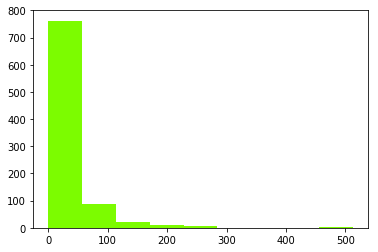

In [19]:
plt.hist('Fare', data = titanic_df, bins = 9, color = 'lawngreen')

In [20]:
titanic_df['Fare'].mean()

32.2042079685746

In [21]:
titanic_df['Fare'].max()

512.3292

In [22]:
titanic_df[titanic_df['Fare'] == 512.3292]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,female
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,male
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,male


In [23]:
titanic_df['Fare'].min()

0.0

In [24]:
titanic_df[titanic_df['Fare'] == 0.0].dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,male
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,male


__3.) What deck were the passengers on and how does that relate to their class?__

In [25]:
deck = titanic_df['Cabin'].fillna('NA')

In [26]:
levels = []

for level in deck:
    levels.append(level[0])
        
cabin_df = DataFrame(levels, columns = ["Level"])


In [27]:

cabin_df = cabin_df[cabin_df.Level != 'T']
cabin_df = cabin_df[cabin_df.Level != 'N']

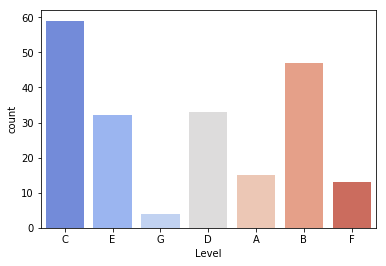

In [28]:
sns.countplot('Level', data = cabin_df, palette = "coolwarm")

In [29]:
cabin_df['Level'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: Level, dtype: int64

In [30]:
titanic_df['Deck'] = levels
titanic_df2 = titanic_df[titanic_df.Deck != 'T']
titanic_df3 = titanic_df2[titanic_df2.Deck != 'N']


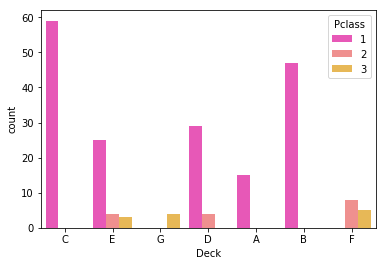

In [31]:
sns.countplot("Deck", data=titanic_df3, hue = 'Pclass', palette = 'spring')

__4.) Where did the passengers come from?__

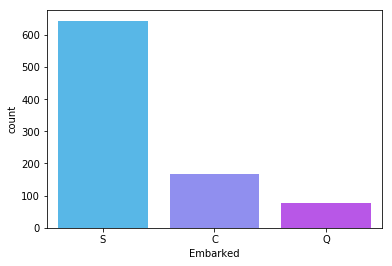

In [32]:
sns.countplot('Embarked', data = titanic_df, palette = 'cool' )

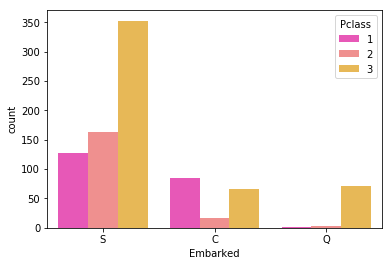

In [33]:
sns.countplot('Embarked', data = titanic_df,hue = 'Pclass', palette = 'spring' )

__5.) Who was alone and who was with family?__

In [34]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,N
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,N


In [35]:
titanic_df['Alone'] = titanic_df['SibSp'] + titanic_df['Parch']

In [36]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [37]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger,Deck,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,N,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,N,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,N,Alone


In [38]:
titanic_df['Alone'].value_counts()

Alone          537
With Family    354
Name: Alone, dtype: int64

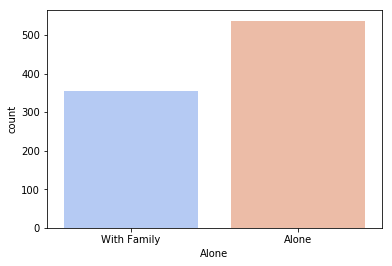

In [39]:
sns.countplot('Alone',data = titanic_df, palette = 'coolwarm')

__6.) How many people survived? Is there a trend we can observe from our results?__

In [40]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'No',1:'Yes'})

In [41]:
titanic_df['Survivor'].value_counts()

No     549
Yes    342
Name: Survivor, dtype: int64

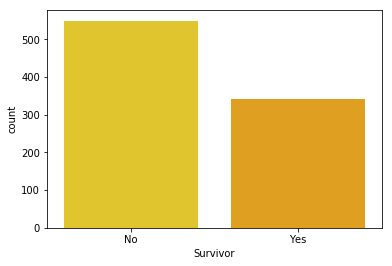

In [42]:
sns.countplot('Survivor', data = titanic_df, palette = 'Wistia')

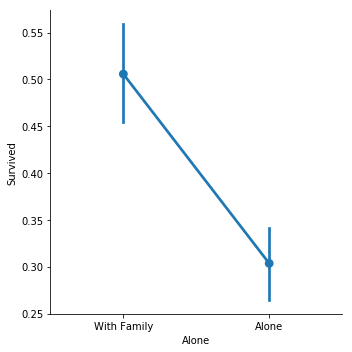

In [43]:
sns.catplot(x = 'Alone',y = 'Survived', kind = 'point', data = titanic_df)

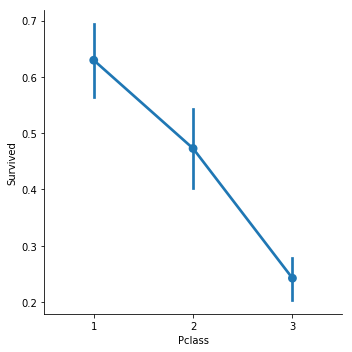

In [44]:
sns.catplot(x = 'Pclass', y = 'Survived', kind = 'point', data = titanic_df)

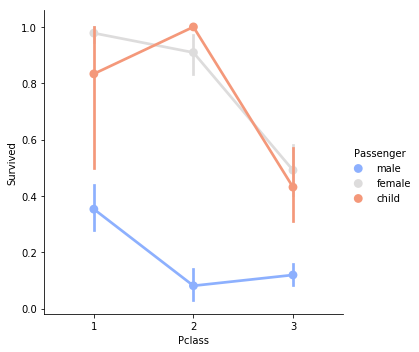

In [45]:
sns.catplot(x = 'Pclass', y = 'Survived', kind = 'point', data = titanic_df, hue = 'Passenger', palette = 'coolwarm')

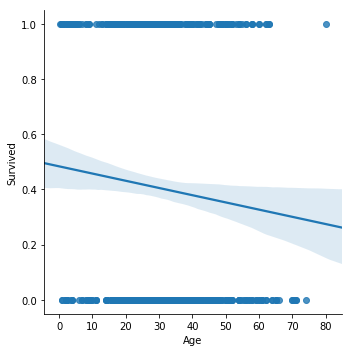

In [46]:
sns.lmplot('Age', 'Survived', data = titanic_df)

In [47]:
generations = [10,20,30,40,50,60,70,80]

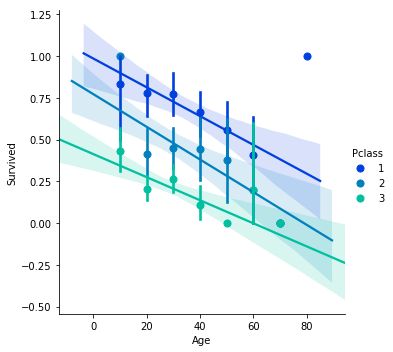

In [48]:
sns.lmplot('Age', 'Survived', data = titanic_df, palette = 'winter', hue = 'Pclass', x_bins = generations)

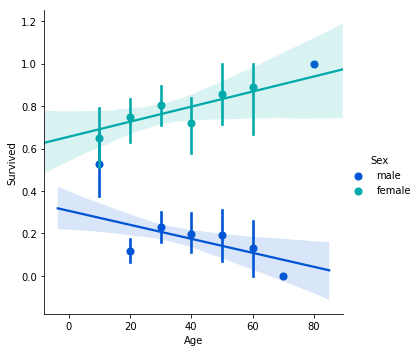

In [49]:
sns.lmplot('Age', 'Survived', data = titanic_df, palette = 'winter', hue = 'Sex', x_bins = generations)

__7.) Who was the oldest person on titanic?__

In [50]:
titanic_df['Age'].max()

80.0

In [51]:
titanic_df[titanic_df['Age'] == 80.0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger,Deck,Alone,Survivor
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S,male,A,Alone,Yes


__8.) Who was with most family?__

In [52]:
titanic_df['FamilyPresent'] = titanic_df['SibSp'] + titanic_df['Parch']

In [53]:
titanic_df['FamilyPresent'].max()

10

In [54]:
titanic_df[titanic_df['FamilyPresent'] == 10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger,Deck,Alone,Survivor,FamilyPresent
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,male,N,With Family,No,10
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,female,N,With Family,No,10
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,male,N,With Family,No,10
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,male,N,With Family,No,10
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,female,N,With Family,No,10
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,male,N,With Family,No,10
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,female,N,With Family,No,10


In [55]:
########################

In [56]:
df1 = titanic_df[titanic_df['Sex'] == 'male']

In [58]:
df2 = df1[df1['Survived'] == 0]

In [59]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger,Deck,Alone,Survivor,FamilyPresent
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,N,With Family,No,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,N,Alone,No,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,N,Alone,No,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,E,Alone,No,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,N,With Family,No,4
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,male,N,Alone,No,0
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,male,N,With Family,No,6
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,child,N,With Family,No,5
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S,male,N,Alone,No,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,male,N,Alone,No,0


In [60]:
df2['Age'].mean()

31.618055555555557

In [61]:
df3 = titanic_df[titanic_df['Sex'] == 'female']

In [62]:
df4 = df3[df3['Survived'] == 0]

In [63]:
df4['Age'].mean()

25.046875